In [3]:
# let the statsmodels library to be consistent with latest pandas
!pip -q install --upgrade statsmodels
!pip install yfinance

# allows us to print multiple outputs from a single Colab cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# load important libraries that we might use
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from scipy.stats import norm


# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('display.max_rows', 6, 'display.max_columns', 500, 'display.max_colwidth', 1, 'display.precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)
plt.rcParams['figure.figsize'] = [16, 6]

In [4]:
ticker_symbol = 'NFLX'

start_date = '2020-01-01'
end_date = '2023-01-01'

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

stock_data['Return'] = stock_data['Adj Close'].pct_change()

stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2020-01-02,326.10,329.98,324.78,329.81,329.81,4485800,NaN
2020-01-03,326.78,329.86,325.53,325.90,325.90,3806900,-0.01
2020-01-06,323.12,336.36,321.20,335.83,335.83,5663100,0.03
2020-01-07,336.47,336.70,330.30,330.75,330.75,4703200,-0.02
2020-01-08,331.49,342.70,331.05,339.26,339.26,7104500,0.03


In [5]:
cleaned_returns = stock_data['Return'].dropna()

mode = cleaned_returns.mode().tolist()

mode = list(map(float, mode))

median = float(np.median(cleaned_returns))

print(f"Моды: {mode}")
print(f"Медиана: {median}")

Моды: [-0.3511660252264417, -0.21790457452041323, -0.11138861972882097, -0.09907982423787387, -0.08627248550671829, -0.0859285103783366, -0.07779137526505964, -0.07690793394973328, -0.07400333512694968, -0.072428117542219, -0.07016160415869266, -0.06922080678345, -0.06878074472384721, -0.06822333565043825, -0.06522691643487755, -0.06361971502644859, -0.06354839756951869, -0.06092639215100171, -0.060623694451675036, -0.060486062172997346, -0.056464571712557254, -0.05560213344497811, -0.0548330692431056, -0.053545087938946856, -0.05155631409734074, -0.050993420206397744, -0.05043879304704557, -0.049697585250411014, -0.04959817318826987, -0.04950530238874051, -0.049001565623885246, -0.04831407265071275, -0.047951176983435095, -0.0463498545134613, -0.04610808699165203, -0.04591020181415317, -0.04573039210027996, -0.04488504219645717, -0.044656223827006625, -0.043487843643154944, -0.04233408287425067, -0.041859290091203594, -0.04178325414125028, -0.041648910976275655, -0.03997294072047808, 

<Figure size 1000x600 with 0 Axes>

(array([ 0.1274,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1274,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1274,  0.1274,  0.2549,  0.5097,  1.2743,  0.892 ,  2.2937,  4.8422,  8.2828, 15.6736, 17.8398, 16.1833, 11.7233,  6.1165,  3.568 ,  2.1663,  1.2743,  1.0194,  1.0194,  0.2549,  0.    ,  0.2549,  0.    ,  0.1274,  0.    ,  0.    ,  0.1274]),
 array([-0.3512, -0.3408, -0.3304, -0.32  , -0.3096, -0.2992, -0.2888, -0.2784, -0.268 , -0.2576, -0.2472, -0.2368, -0.2264, -0.216 , -0.2056, -0.1953, -0.1849, -0.1745, -0.1641, -0.1537, -0.1433, -0.1329, -0.1225, -0.1121, -0.1017, -0.0913, -0.0809, -0.0705, -0.0601, -0.0497, -0.0393, -0.0289, -0.0186, -0.0082,  0.0022,  0.0126,  0.023 ,  0.0334,  0.0438,  0.0542,  0.0646,  0.075 ,  0.0854,  0.0958,  0.1062,  0.1166,  0.127 ,  0.1374,  0.1478,  0.1581,  0.1685]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'Return')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Daily Return Distribution')

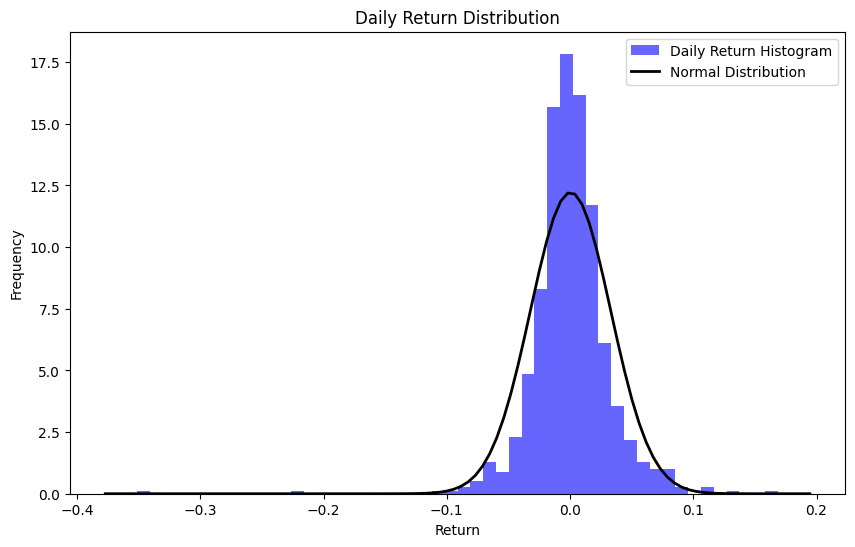

In [ ]:
daily_return = stock_data['Return'].dropna()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(daily_return, bins=50, density=True, alpha=0.6, color='b', label='Daily Return Histogram')

# Вычисление параметров нормального распределения (среднего и стандартного отклонения) на основе данных
mu, std = norm.fit(daily_return)

# Построение нормированной гауссовой функции
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Daily Return Distribution')
plt.legend()

plt.show()

<Figure size 1000x600 with 0 Axes>

(array([0.0516, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0516, 0.0516, 0.    , 0.    , 0.    , 0.0516, 0.    , 0.    , 0.0516, 0.0516, 0.2066, 0.0516, 0.2066, 0.2066, 0.3098, 0.2582, 0.1033, 0.    , 0.0516, 0.0516, 0.    , 0.0516]),
 array([-23.9063, -23.3531, -22.7998, -22.2465, -21.6932, -21.1399, -20.5866, -20.0333, -19.48  , -18.9267, -18.3734, -17.8201, -17.2668, -16.7136, -16.1603, -15.607 , -15.0537, -14.5004, -13.9471, -13.3938, -12.8405, -12.2872, -11.7339, -11.1806, -10.6274, -10.0741,  -9.5208,  -8.9675,  -8.4142,  -7.8609,  -7.3076,  -6.7543,  -6.201 ,  -5.6477,  -5.0944,  -4.5411,  -3.9879,  -3.4346,  -2.8813,  -2.328 ,  -1.7747,  -1.2214,  -0.6681,  -0.1148,   0.4385,   0.9918,   1.5451,   2.0984,   2.6516,   3.2049,   3.7582]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'Return')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Monthly Return Distribution')

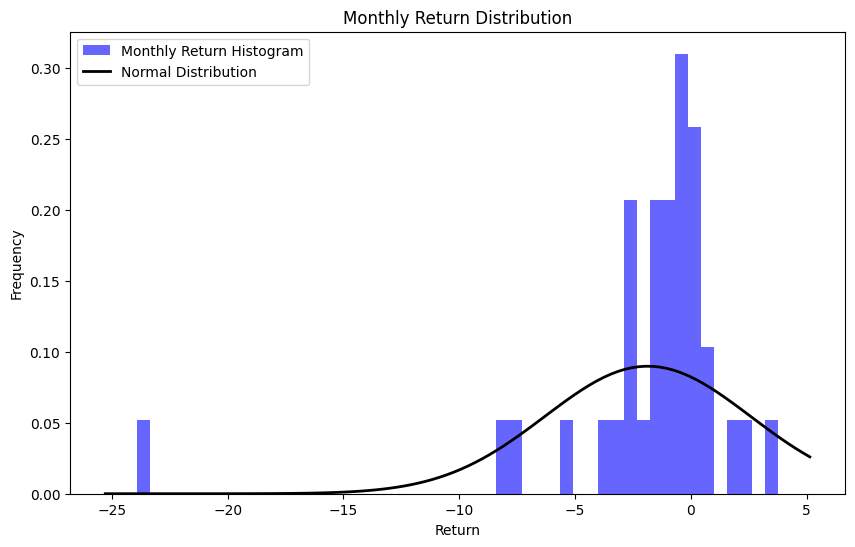

In [ ]:
monthly_return = stock_data['Return'].resample('M').ffill().pct_change().dropna()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(monthly_return, bins=50, density=True, alpha=0.6, color='b', label='Monthly Return Histogram')

# Вычисление параметров нормального распределения (среднего и стандартного отклонения) на основе данных
mu, std = norm.fit(monthly_return)

# Построение нормированной гауссовой функции
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Monthly Return Distribution')
plt.legend()

plt.show()


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:419: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:424: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


Text(0.5, 0, 'Return')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Monthly Return Distribution')

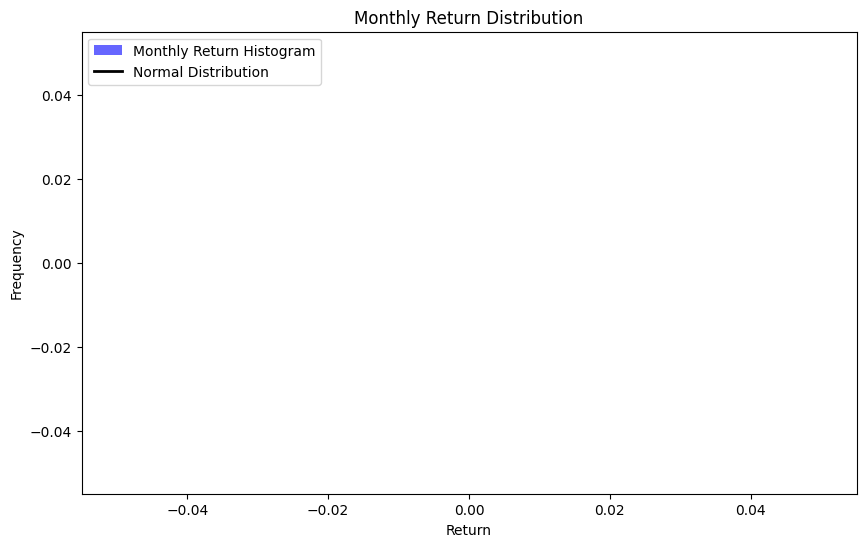

In [14]:
monthly_return_start = stock_data['Return'].resample('MS').first()  # Начало месяца
monthly_return_end = stock_data['Return'].resample('M').last()     # Конец месяца

# Вычисление месячной доходности между началом и концом месяца
monthly_return = (monthly_return_end - monthly_return_start) / monthly_return_start

# Удаление пропущенных или бесконечных значений
monthly_return = monthly_return.dropna()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(monthly_return, bins=50, density=True, alpha=0.6, color='b', label='Monthly Return Histogram')

# Вычисление параметров нормального распределения (среднего и стандартного отклонения) на основе данных
mu, std = norm.fit(monthly_return)

# Построение нормированной гауссовой функции
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Monthly Return Distribution')
plt.legend()

plt.show()



<Figure size 1000x600 with 0 Axes>

(array([81.4862,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 81.4862]),
 array([-1.8192, -1.8131, -1.807 , -1.8008, -1.7947, -1.7885, -1.7824, -1.7763, -1.7701, -1.764 , -1.7579, -1.7517, -1.7456, -1.7395, -1.7333, -1.7272, -1.7211, -1.7149, -1.7088, -1.7026, -1.6965, -1.6904, -1.6842, -1.6781, -1.672 , -1.6658, -1.6597, -1.6536, -1.6474, -1.6413, -1.6351, -1.629 , -1.6229, -1.6167, -1.6106, -1.6045, -1.5983, -1.5922, -1.5861, -1.5799, -1.5738, -1.5676, -1.5615, -1.5554, -1.5492, -1.5431, -1.537 , -1.5308, -1.5247, -1.5186, -1.5124]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'Return')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Yearly Return Distribution')

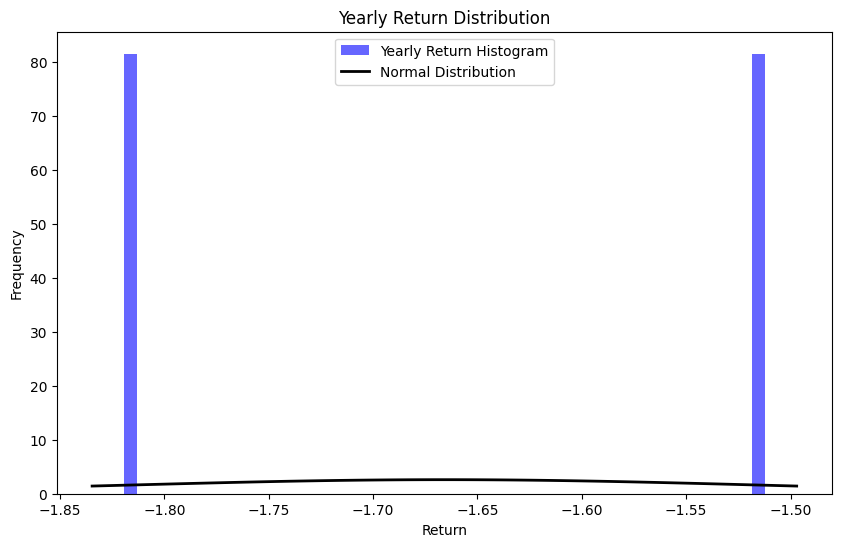

In [ ]:
yearly_return = stock_data['Return'].resample('Y').ffill().pct_change().dropna()

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(yearly_return, bins=50, density=True, alpha=0.6, color='b', label='Yearly Return Histogram')

# Вычисление параметров нормального распределения (среднего и стандартного отклонения) на основе данных
mu, std = norm.fit(yearly_return)

# Построение нормированной гауссовой функции
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Yearly Return Distribution')
plt.legend()

plt.show()

In [ ]:
from scipy import stats

# Выбираем только daily return и удаляем пропущенные значения.
daily_return = stock_data['Return'].dropna()

# Проводим тест Шапиро-Уилка на нормальность.
statistic, p_value = stats.shapiro(daily_return)

# Уровень значимости (обычно 0.05)
alpha = 0.05

# Выводим результаты теста.
print(f"Статистика теста: {statistic}")
print(f"P-значение: {p_value}")

if p_value > alpha:
    print("Нулевая гипотеза: Распределение нормально (не отвергается)")
else:
    print("Альтернативная гипотеза: Распределение не нормально (отвергается)")

Статистика теста: 0.8663321733474731
P-значение: 7.4327781040798005e-25
Альтернативная гипотеза: Распределение не нормально (отвергается)


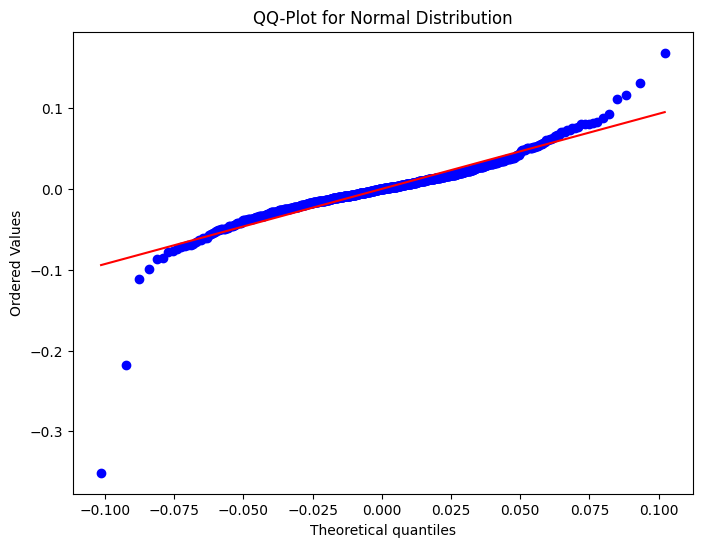

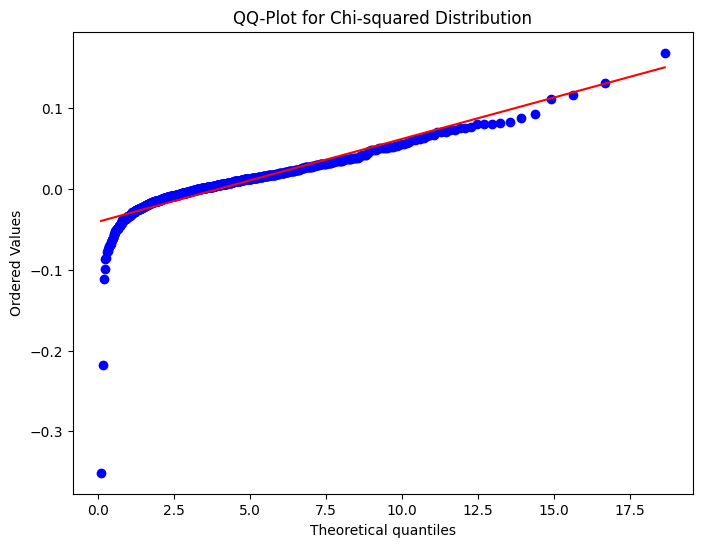

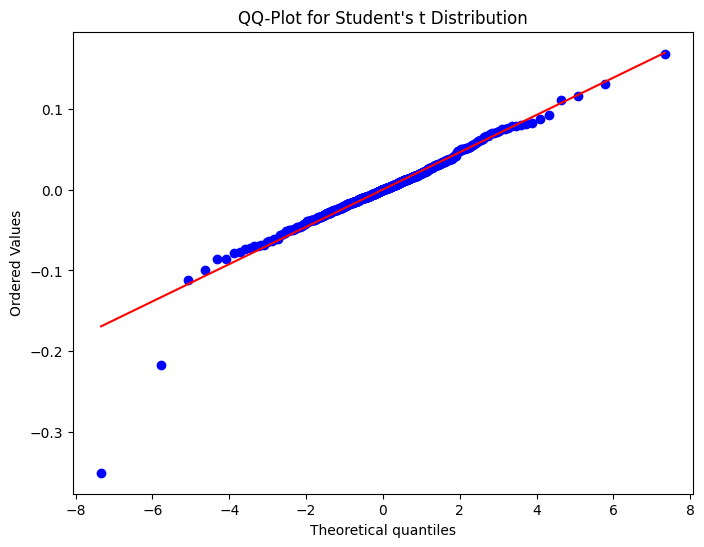

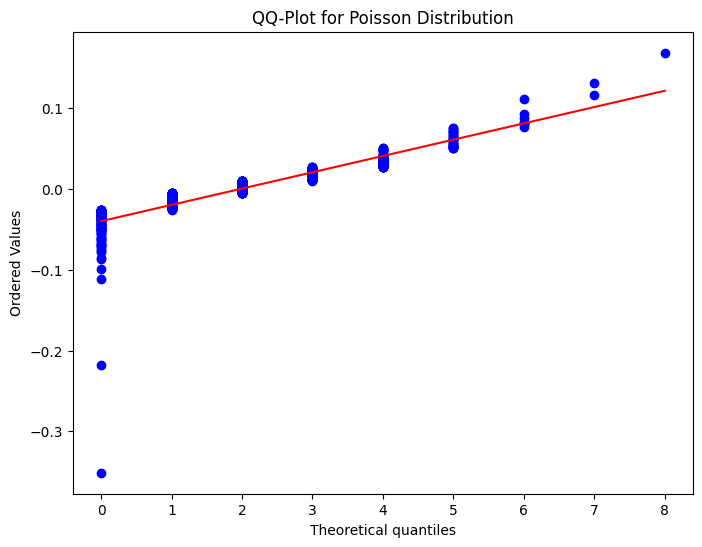

In [ ]:
monthly_return = stock_data['Return'].dropna()

# Function to plot QQ-plots for different distributions.
def plot_qq(dist, dist_params, dist_name):
    plt.figure(figsize=(8, 6))
    stats.probplot(monthly_return, dist=dist, sparams=dist_params, plot=plt)
    plt.title(f'QQ-Plot for {dist_name} Distribution')
    plt.show()

# Normal distribution
plot_qq('norm', (monthly_return.mean(), monthly_return.std()), 'Normal')

# Chi-squared distribution with 4 degrees of freedom
plot_qq('chi2', (4,), 'Chi-squared')

# Student's t-distribution with 4 degrees of freedom
plot_qq('t', (4,), 'Student\'s t')

# Poisson distribution (example using lambda=2)
plot_qq('poisson', (2,), 'Poisson')

In [12]:
vector = stock_data['Return'].dropna()

positive_returns = vector[vector > 0]

returns_vector = positive_returns.tolist()

# Вычисляем среднюю длину серии.
mean_series_length = np.mean(returns_vector)

# Вычисляем параметр распределения Пуассона (лямбда) на основе средней длины серии.
poisson_lambda = mean_series_length

# Вычисляем вероятности для каждой длины серии по распределению Пуассона.
poisson_probabilities = [poisson.pmf(k, poisson_lambda) for k in range(1, int(max(returns_vector)) + 1)]

# Задаем уровень значимости для теста.
alpha = 0.05

# Вычисляем ожидаемые частоты для каждой длины серии на основе распределения Пуассона.
expected_frequencies = [len(returns_vector) * p for p in poisson_probabilities]

# Вычисляем наблюдаемые частоты (фактические частоты в данных).
observed_frequencies = [returns_vector.count(k) for k in range(1, int(max(returns_vector)) + 1)]

# Вычисляем статистику хи-квадрат.
chi_square_statistic = sum([(observed - expected) ** 2 / expected for observed, expected in zip(observed_frequencies, expected_frequencies)])

# Вычисляем p-значение для теста хи-квадрат.
from scipy.stats import chi2
degrees_of_freedom = len(poisson_probabilities) - 1
p_value = 1 - chi2.cdf(chi_square_statistic, degrees_of_freedom)

# Проверяем нулевую гипотезу: данные описываются распределением Пуассона.
if p_value < alpha:
    print("Нулевая гипотеза отвергается: данные не описываются распределением Пуассона.")
else:
    print("Нулевая гипотеза не отвергается: данные описываются распределением Пуассона.")

Нулевая гипотеза не отвергается: данные описываются распределением Пуассона.
